# Analysing Posts on Hacker News

# Index

- [1 Introduction](#1)
- [2 Reading the Data](#2)
- [3 Identifying Posts by their Type](#3)
- [4 Analysing the Impact of Time of Day](#4)
- [5 Conclusion](#5)

# 1

## Introduction

[Y Combinator](https://www.ycombinator.com/) a startup incubator, hosts a site called [Hacker News](https://news.ycombinator.com/). The site contains posts (or stories as they are called in Hacker News) submitted by users which can be voted or commented on. The site is very popular among start-up circles. Therefore posts that get very high up-votes can tend to attract a large following.

Among the various post types, HN (Hacker News) has special sections for two particular post types namely Ask HN and Show HN posts.

If a post title is prefixed with **Ask HN**, the post is meant to pose a question to the HN community. The question could be a query or a doubt. If a post title is prefixed with **Show HN** then the post is meant for exhibiting the HN community a project the user may have done. It may also be to get an opinion from the community regarding the said project or work.

The goal of this project is to compare __Ask HN__ and __Show HN__ posts. The focus will be on:
- which post type recieved more comments on average
- whether the time the post was created on has influence on the average number of comments.

[Index](#Index)

# 2

## Reading the Data

The full dataset for the project can be found [here](https://www.kaggle.com/hacker-news/hacker-news-posts). The explanation of every column has been provided in the link.

It must be noted that while the dataset contains nearly 300,000 records, the dataset that will be used for the project only contains about 20,000 records.

The data set being used here is one created by DQ(Dataquest) for the purpose of learning. The data set was created by removing all posts for which there were no comments and then randomly sampling 20000 records from the remaining dataset.

In [196]:
#Reading the dataset
import pandas as pd
hn = pd.read_csv("hacker_news.csv")
hn[:15]

,id,title,url,num_points,num_comments,author,created_at
0,12224879,Interactive Dynamic Video,http://www.interactivedynamicvideo.com/,386,52,ne0phyte,8/4/2016 11:52
1,10975351,How to Use Open Source and Shut the Fuck Up at...,http://hueniverse.com/2016/01/26/how-to-use-op...,39,10,josep2,1/26/2016 19:30
2,11964716,Florida DJs May Face Felony for April Fools' W...,http://www.thewire.com/entertainment/2013/04/f...,2,1,vezycash,6/23/2016 22:20
3,11919867,Technology ventures: From Idea to Enterprise,https://www.amazon.com/Technology-Ventures-Ent...,3,1,hswarna,6/17/2016 0:01
4,10301696,Note by Note: The Making of Steinway L1037 (2007),http://www.nytimes.com/2007/11/07/movies/07ste...,8,2,walterbell,9/30/2015 4:12
5,10482257,Title II kills investment? Comcast and other I...,http://arstechnica.com/business/2015/10/comcas...,53,22,Deinos,10/31/2015 9:48
6,10557283,Nuts and Bolts Business Advice,NaN,3,4,shomberj,11/13/2015 0:45
7,12296411,Ask HN: How to improve my personal website?,NaN,2,6,ahmedbaracat,8/16/2016 9:55
8,11337617,"Shims, Jigs and Other Woodworking Concepts to ...",http://firstround.com/review/shims-jigs-and-ot...,34,7,zt,3/22/2016 16:18
9,10379326,That self-appendectomy,http://www.southpolestation.com/trivia/igy1/ap...,91,10,jimsojim,10/13/2015 9:30


Since the _id_ column is unique and the _URL_ column has no relevance to our analysis they can be removed.

In [144]:
#Removing the id and url columns
hn = hn.drop(["id",'url'],axis = 1)

In [145]:
hn[:15]

,title,num_points,num_comments,author,created_at
0,Interactive Dynamic Video,386,52,ne0phyte,8/4/2016 11:52
1,How to Use Open Source and Shut the Fuck Up at...,39,10,josep2,1/26/2016 19:30
2,Florida DJs May Face Felony for April Fools' W...,2,1,vezycash,6/23/2016 22:20
3,Technology ventures: From Idea to Enterprise,3,1,hswarna,6/17/2016 0:01
4,Note by Note: The Making of Steinway L1037 (2007),8,2,walterbell,9/30/2015 4:12
5,Title II kills investment? Comcast and other I...,53,22,Deinos,10/31/2015 9:48
6,Nuts and Bolts Business Advice,3,4,shomberj,11/13/2015 0:45
7,Ask HN: How to improve my personal website?,2,6,ahmedbaracat,8/16/2016 9:55
8,"Shims, Jigs and Other Woodworking Concepts to ...",34,7,zt,3/22/2016 16:18
9,That self-appendectomy,91,10,jimsojim,10/13/2015 9:30


[Index](#Index)

# 3

## Identifying Posts by their Type

Based on the discussion above, we will need to classify the posts based on their type. Once we have segragated the posts, we can calculate the average number of comments and total number of comments for each post type.

In [146]:
# Setting the title column to lower case
hn["title"] = hn["title"].str.lower()
hn[:10]["title"]

0                            interactive dynamic video
1    how to use open source and shut the fuck up at...
2    florida djs may face felony for april fools' w...
3         technology ventures: from idea to enterprise
4    note by note: the making of steinway l1037 (2007)
5    title ii kills investment? comcast and other i...
6                       nuts and bolts business advice
7          ask hn: how to improve my personal website?
8    shims, jigs and other woodworking concepts to ...
9                               that self-appendectomy
Name: title, dtype: object

In [147]:
# Identifying the type of each post using boolean indexing
hn.loc[hn["title"].str.startswith("ask hn"), "type"]="ask"
hn.loc[hn["title"].str.startswith("show hn"), "type"]="show"
hn.loc[hn["type"].isnull(),"type"]="others"

In [148]:
hn[:10]

,title,num_points,num_comments,author,created_at,type
0,interactive dynamic video,386,52,ne0phyte,8/4/2016 11:52,others
1,how to use open source and shut the fuck up at...,39,10,josep2,1/26/2016 19:30,others
2,florida djs may face felony for april fools' w...,2,1,vezycash,6/23/2016 22:20,others
3,technology ventures: from idea to enterprise,3,1,hswarna,6/17/2016 0:01,others
4,note by note: the making of steinway l1037 (2007),8,2,walterbell,9/30/2015 4:12,others
5,title ii kills investment? comcast and other i...,53,22,Deinos,10/31/2015 9:48,others
6,nuts and bolts business advice,3,4,shomberj,11/13/2015 0:45,others
7,ask hn: how to improve my personal website?,2,6,ahmedbaracat,8/16/2016 9:55,ask
8,"shims, jigs and other woodworking concepts to ...",34,7,zt,3/22/2016 16:18,others
9,that self-appendectomy,91,10,jimsojim,10/13/2015 9:30,others


Now that we have segragated the posts by type, we can the average number of comments and average points by post type.

In [149]:
# Calculating the average number of comments and points by post type
new_hn_avg = hn.groupby(by="type").mean().reset_index()
new_hn_avg.rename(columns = {"num_points":"avg_points", "num_comments":"avg_num_comments"},inplace=True)
new_hn_avg

,type,avg_points,avg_num_comments
0,ask,15.061927,14.038417
1,others,55.406770,26.873037
2,show,27.555077,10.316695


We could find the total number of comments and the total number of points by post type.

In [150]:
# Calculating the total number of comments and points by post type
new_hn_total = hn.groupby(by="type").sum().reset_index()
new_hn_total.rename(columns = {"num_points":"total_points","num_comments":"total_num_comments"},inplace=True)
new_hn_total

,type,total_points,total_num_comments
0,ask,26268,24483
1,others,952664,462055
2,show,32019,11988


In [151]:
# Creating a new dataframe with the aggregated data
joined_data = pd.merge(new_hn_avg,new_hn_total,on = "type")

With the new set of data, we could create a single table to view the data and also analyse the same with graphs.

In [152]:
joined_data["avg_points"] = joined_data["avg_points"].round(2)
joined_data["avg_num_comments"] = joined_data["avg_num_comments"].round(2)
joined_data

,type,avg_points,avg_num_comments,total_points,total_num_comments
0,ask,15.06,14.04,26268,24483
1,others,55.41,26.87,952664,462055
2,show,27.56,10.32,32019,11988


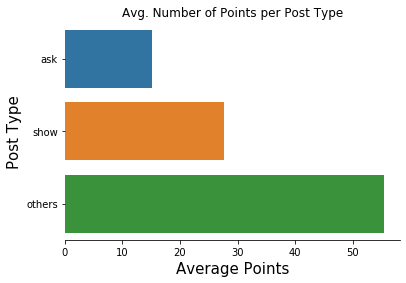

In [153]:
import seaborn as sns
plt = sns.barplot(data = joined_data, x = 'avg_points', y = 'type', order = ['ask','show','others'])
sns.despine(left = True)
plt.set_title('Avg. Number of Points per Post Type')
plt.set_xlabel('Average Points', size = 15)
plt.set_ylabel('Post Type', size = 15);

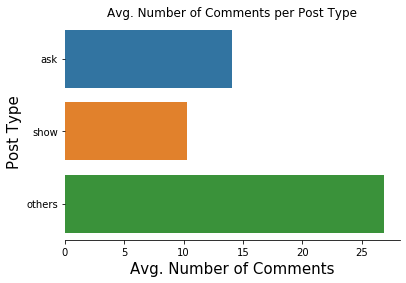

In [154]:
import seaborn as sns
plt = sns.barplot(data = joined_data, x = 'avg_num_comments', y = 'type', order = ['ask','show','others'])
sns.despine(left = True)
plt.set_title('Avg. Number of Comments per Post Type')
plt.set_xlabel('Avg. Number of Comments', size = 15)
plt.set_ylabel('Post Type', size = 15);

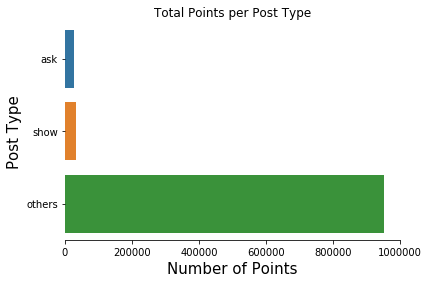

In [155]:
import seaborn as sns
plt = sns.barplot(data = joined_data, x = 'total_points', y = 'type', order = ['ask','show','others'])
sns.despine(left = True)
plt.set_title('Total Points per Post Type')
plt.set_xlabel('Number of Points', size = 15)
plt.set_ylabel('Post Type', size = 15);

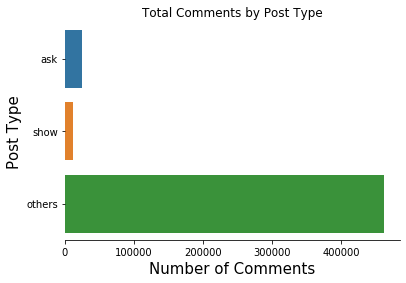

In [156]:
import seaborn as sns
plt = sns.barplot(data = joined_data, x = 'total_num_comments', y = 'type', order = ['ask','show','others'])
sns.despine(left = True)
plt.set_title('Total Comments by Post Type')
plt.set_xlabel('Number of Comments', size = 15)
plt.set_ylabel('Post Type', size = 15);

It is clear from the analysis above that posts associated to _show_ have clearly more points and those associated to _ask_ have more comments. Those asking a question will have a lot of people attempting to answer that question. Questions may also lead to discussions and therefore an increase in the number of comments. Some questions may be common or helpful to the general public thus calling for better upvotes. 

Posts associated to _show_ , on the other hand do not warrant a deep discussion. Instead they seek feedback. This feedback is more easily given in points possibly with some additional comments.

[Index](#Index)

# 4

## Analysing the Impact of Time of Day

Each post has a record of the date and time at which it was created. Analyzing this time could reveal when a question must be asked to recieve the most number of answers. More specifically, we could find out the hour of the day during which if a question is asked, it would receive the most answers.

To get the information we require, we could begin by extracting the hour from the time provided and then summarizing the number of comments for each _ask_ post by the hour.

In [157]:
hn[:10]

,title,num_points,num_comments,author,created_at,type
0,interactive dynamic video,386,52,ne0phyte,8/4/2016 11:52,others
1,how to use open source and shut the fuck up at...,39,10,josep2,1/26/2016 19:30,others
2,florida djs may face felony for april fools' w...,2,1,vezycash,6/23/2016 22:20,others
3,technology ventures: from idea to enterprise,3,1,hswarna,6/17/2016 0:01,others
4,note by note: the making of steinway l1037 (2007),8,2,walterbell,9/30/2015 4:12,others
5,title ii kills investment? comcast and other i...,53,22,Deinos,10/31/2015 9:48,others
6,nuts and bolts business advice,3,4,shomberj,11/13/2015 0:45,others
7,ask hn: how to improve my personal website?,2,6,ahmedbaracat,8/16/2016 9:55,ask
8,"shims, jigs and other woodworking concepts to ...",34,7,zt,3/22/2016 16:18,others
9,that self-appendectomy,91,10,jimsojim,10/13/2015 9:30,others


Before beginning the analysis we need to extract the hour from the date-time details provided.

In [197]:
#Extracting the hour from the date-time detail.
import datetime as dt
hn["hour"] = pd.to_datetime(hn["created_at"],format = "%m/%d/%Y %H:%M")
hn["hour"] = hn["hour"].dt.hour
hn[:10]

,id,title,url,num_points,num_comments,author,created_at,hour
0,12224879,Interactive Dynamic Video,http://www.interactivedynamicvideo.com/,386,52,ne0phyte,8/4/2016 11:52,11
1,10975351,How to Use Open Source and Shut the Fuck Up at...,http://hueniverse.com/2016/01/26/how-to-use-op...,39,10,josep2,1/26/2016 19:30,19
2,11964716,Florida DJs May Face Felony for April Fools' W...,http://www.thewire.com/entertainment/2013/04/f...,2,1,vezycash,6/23/2016 22:20,22
3,11919867,Technology ventures: From Idea to Enterprise,https://www.amazon.com/Technology-Ventures-Ent...,3,1,hswarna,6/17/2016 0:01,0
4,10301696,Note by Note: The Making of Steinway L1037 (2007),http://www.nytimes.com/2007/11/07/movies/07ste...,8,2,walterbell,9/30/2015 4:12,4
5,10482257,Title II kills investment? Comcast and other I...,http://arstechnica.com/business/2015/10/comcas...,53,22,Deinos,10/31/2015 9:48,9
6,10557283,Nuts and Bolts Business Advice,NaN,3,4,shomberj,11/13/2015 0:45,0
7,12296411,Ask HN: How to improve my personal website?,NaN,2,6,ahmedbaracat,8/16/2016 9:55,9
8,11337617,"Shims, Jigs and Other Woodworking Concepts to ...",http://firstround.com/review/shims-jigs-and-ot...,34,7,zt,3/22/2016 16:18,16
9,10379326,That self-appendectomy,http://www.southpolestation.com/trivia/igy1/ap...,91,10,jimsojim,10/13/2015 9:30,9


In [169]:
#Consolidating the number of Ask posts by hour
ask_posts = hn[hn["type"] == 'ask'][["num_comments","hour"]]
ask_posts = ask_posts.groupby("hour").mean().reset_index()
ask_posts

,hour,num_comments
0,0,8.127273
1,1,11.383333
2,2,23.810345
3,3,7.796296
4,4,7.170213
5,5,10.086957
6,6,9.022727
7,7,7.852941
8,8,10.250000
9,9,5.577778


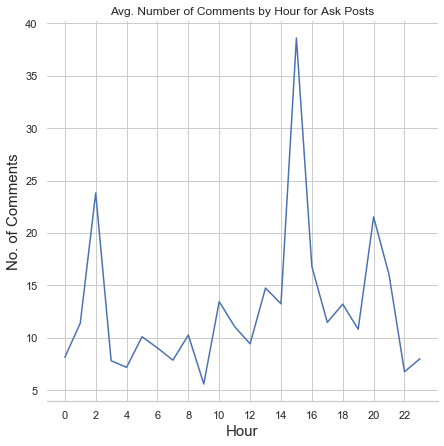

In [191]:
from matplotlib import pyplot as plt
#Setting size of plot
fig = plt.figure(figsize=(7,7))
#Creating the line plot
sns.set(style = "whitegrid")
plt = sns.lineplot(data = ask_posts, x = 'hour', y = 'num_comments')
#Cleaning the plot
sns.despine(left = True)
plt.set_title("Avg. Number of Comments by Hour for Ask Posts")
plt.set_xlabel("Hour", size = 15)
plt.set_ylabel("No. of Comments", size = 15)
plt.set_xticks([0,2,4,6,8,10,12,14,16,18,20,22]);

It is clear from the above analysis that questions asked at the 15th hour of the day which is between 3:00-4:00 PM invites the most number comments. 

In the same vein it would be interesting to know the impact of the time of day on the points alloted. We saw earlier that _show_ posts tend to have more average points than _ask_ posts. However total points between _show_ and _ask_ posts are not too far off. For this reason we shall compare the average number of points per hour for all posts.

In [192]:
#Consolidating post points by hour
most_points = hn[["num_points","hour"]]
most_points = most_points.groupby("hour").mean().reset_index()
most_points

,hour,num_points
0,0,53.575323
1,1,45.413265
2,2,50.886578
3,3,49.631148
4,4,44.258065
5,5,44.245033
6,6,42.371795
7,7,51.803150
8,8,48.207612
9,9,48.742200


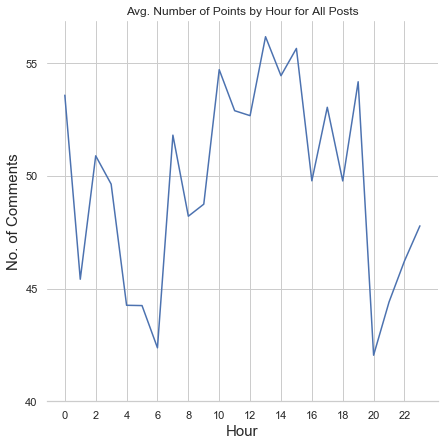

In [195]:
from matplotlib import pyplot as plt

# Setting size of layout
fig = plt.figure(figsize=(7,7))
sns.set(style = "whitegrid")
# Setting the line plot
plt = sns.lineplot(data = most_points, x = 'hour', y = 'num_points')
#Cleaning up the plot
sns.despine(left = True)
plt.set_title("Avg. Number of Points by Hour for All Posts")
plt.set_xlabel("Hour", size = 15)
plt.set_ylabel("No. of Comments", size = 15)
plt.set_xticks([0,2,4,6,8,10,12,14,16,18,20,22]);
plt.set_yticks([40,45,50,55]);

As can be seen above, the points assigned to posts at any given point through out the day range between 43 and 53. We cannot definitively say that the time of day has a significant impact on the points alloted as the points do not vary significantly through the course of the day and because the allotment of points is subjective to the kind of posts that have been put up.

[Index](#Index)

# 5

## Conclusion

The goal of this project was to analyze a sample of 20,000 posts from the Hacker News site run by YCombinator and deduce the impact of the type of posts on the number of comments from users and they number of points allotted by users for a post. In addition we also try to analyse the impact of the time of the day on the number of comments put up by users and the number of points alloted by readers. 

_Ask_ related posts tend to get more comments while _Show_ related posts tend to get more points in comparison. Questions posed betweem 3 and 4 PM tend to get more replies than at any other time of the day. However the allotment of points through the course of the day is between 43-53.

[Index](#Index)